

<h1 style="text-align: center">Titanic disaster Dataset</h1>

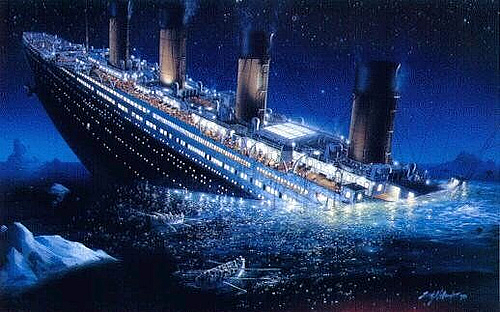

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing

In [ ]:
import pandas as pd
### Let's import our data

titanic =pd.read_csv('../input/titanic/train.csv')
test= pd.read_csv('../input/titanic/test.csv')



In [ ]:
titanic= pd.DataFrame(titanic)
print(titanic)

# convert into dataframe using pandas

In [ ]:
titanic.head()

In [ ]:
titanic.Age.describe()


In [ ]:
titanic.shape

In [ ]:
titanic.info()

In [ ]:
titanic.columns.values

In [ ]:
list(titanic)

In [ ]:
titanic.dtypes

In [ ]:
# concate test and train dataset

titanic = titanic.append(test , ignore_index = True)
titanic.head()

In [ ]:
#check for any other unusable values

titanic.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#initialize label endoce as first step.
le = LabelEncoder()

titanic['Sex'] = le.fit_transform(titanic['Sex'].values)

# or you can use pd.dummies

In [ ]:
titanic = titanic.drop('Name', axis=1,)
titanic = titanic.drop('Ticket', axis=1,)
titanic = titanic.drop('Fare', axis=1,)
titanic= titanic.drop('Cabin', axis=1,)
titanic= titanic.drop('Embarked', axis=1,)
#dropping columns which is not important

In [ ]:
titanic.info()

titanic.head()

In [ ]:
titanic=titanic[~titanic['Age'].isna()]
# dropping null values

In [ ]:
titanic=titanic[~titanic['Survived'].isna()]

In [ ]:
titanic.info()
titanic.head()

# Data visualization


In [ ]:
sns.barplot(x='Pclass', y='Sex', data=titanic)


In [ ]:
# Countplot
sns.catplot(x ="Survived", hue ="Sex", 
kind ="count", data = titanic)

In [ ]:
# Violinplot Displays distribution of data 
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", 
data = titanic, split = True)

In [ ]:
sns.barplot(x ='Pclass', y ='Survived',data = titanic)
print("Percentage of Pclass = 1 who survived:", titanic["Survived"][titanic["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", titanic["Survived"][titanic["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", titanic["Survived"][titanic["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=titanic)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue= 'Survived',data=titanic,palette='RdBu_r')

In [ ]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=40)


In [ ]:
sns.countplot(x='Survived',data=titanic)

In [ ]:

titanic['Age'].hist(color='green',bins=40,figsize=(8,4))


In [ ]:
sns.boxplot(x="Pclass", y="Sex", data=titanic)
sns.swarmplot(x="Pclass", y="Sex", data=titanic,color ='.24')


In [ ]:
cols=['Pclass','Age','Sex']
pd.plotting.scatter_matrix(titanic[cols], figsize = (10, 10), diagonal = 'kde')


### Splitting the dataset into train and test,
## then  Importing  models  from sklearn  to train the  model and test it .

In [ ]:

titanic['Age'].mean()


In [ ]:
titanic.plot.scatter(x="Pclass", y="Age")


In [ ]:
y =titanic['Survived']

In [ ]:
X=titanic['Sex']

In [ ]:

X=titanic.iloc[:,:4].values
y=titanic.iloc[:, 1].values
print(X)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state=0)

In [ ]:
#Using LogisticRegression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
y_pred= regressor.predict(X_test)
print(y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,pred_y))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,pred_y)
print(confusion_mat)
print(classification_report(y_test,pred_y))

In [ ]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

In [ ]:

#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred3)
print(confusion_mat)
print(classification_report(y_test,y_pred3))


In [ ]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred4)
print(confusion_mat)
print(classification_report(y_test,y_pred4))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report

In [ ]:

lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)

print('Accuracy_score:',accuracy_score(y_test,y_test_pred))

# OR

In [ ]:

#Other Classification models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
er = ExtraTreesClassifier()


In [ ]:
#CV

seed = 7

models = []

models.append(('Losgistic Regression', lr))
models.append(('Random Forest', rf))
models.append(('KNN', knn))
models.append(('Decision Tree', dt))
models.append(('Gaussian', gnb))
models.append(('ExtraTreesRegressor', er))


# Thank you !